# Color y espacios cromáticos

##  a) Espacio YIQ

* **Luminancia (Y, 80% de importancia):** brillo del estímulo cromático. Combinación ponderada de la energía de la componente acromática y cromática.

* **Saturación (I, 15% de la varianza):** pureza del color. Relación entre la energía de las componentes cromáticas y acromáticas.

* **Crominancia (Q, 5% de la varianza):** longitud de onda dominante que define el color propio del estímulo (gama de rojos, amarillos, verdes, etc).

## b) Espacio XYZ

* ***X:*** Curva de sensibilidad del **rojo**.
* ***Y:*** Curva de sensibilidad del **verde**.
* ***Z:*** Curva de sensibilidad del **azul**.

<div>
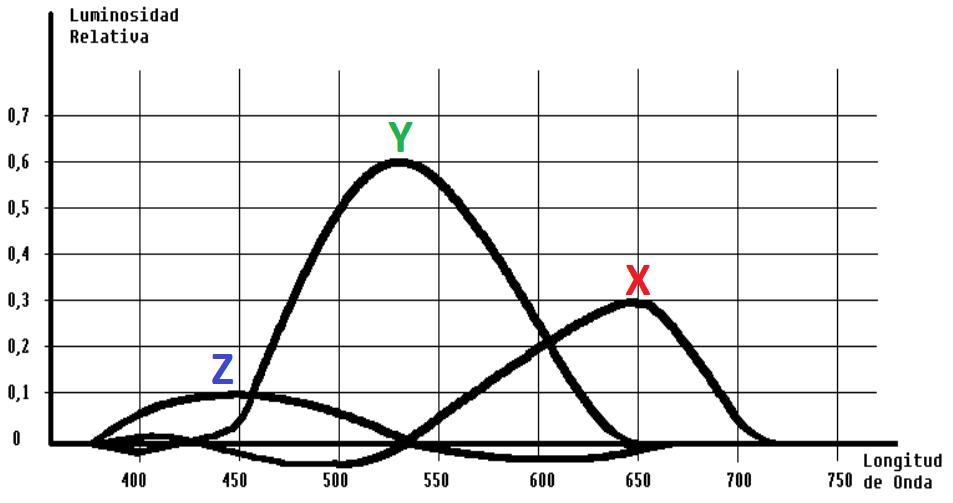
</div>

# Luminancia y saturación

* Manipulación independiente de la luminancia y la saturación de una imagen.
* Conversión de la imagen del espacio RGB al espacio YIQ.
* Alteración de los valores de Y (luminancia) o de IQ (saturación).
* Visualización en el espacio RGB de la nueva imagen.

## 1. Lectura de la imagen

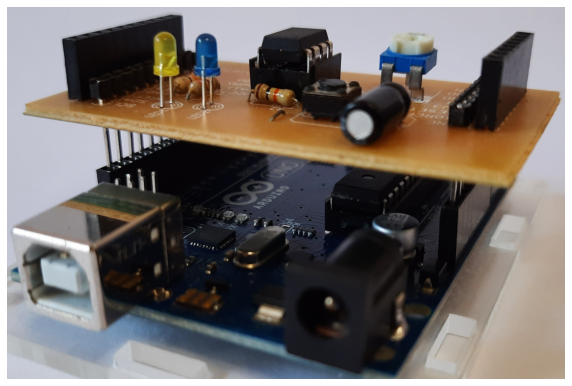

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Ubicación y nombre de la imagen
path = 'docs/'
file_name = 'ardu_shield.jpg'

# Objeto Image de la imagen en 'path + file_name'
# Se recorta la zona de interés (left, upper, right, lower)
im_object = Image.open(path + file_name).crop((850,100, 3700, 2000))

plt.figure(figsize=(10,10))
plt.imshow(im_object)
plt.axis('off')
plt.show()

## 2. Normalización

In [2]:
# Convertir en una matriz Numpy de uint8
im = np.array(im_object).astype(np.uint8)

# Se normaliza la imagen
im_norm = im/255.0

print(im_norm[0])

[[0.74509804 0.76078431 0.80392157]
 [0.74117647 0.75686275 0.8       ]
 [0.7372549  0.75294118 0.79607843]
 ...
 [0.7372549  0.73333333 0.76470588]
 [0.74117647 0.7372549  0.76862745]
 [0.74117647 0.7372549  0.76862745]]


In [3]:
im.shape

(1900, 2850, 3)

## 3. Conversión de espacios

* Se definen dos funciones encargadas de realizar la conversión de los espacion YIQ y RGB, según las matrices correspondientes:

<div>
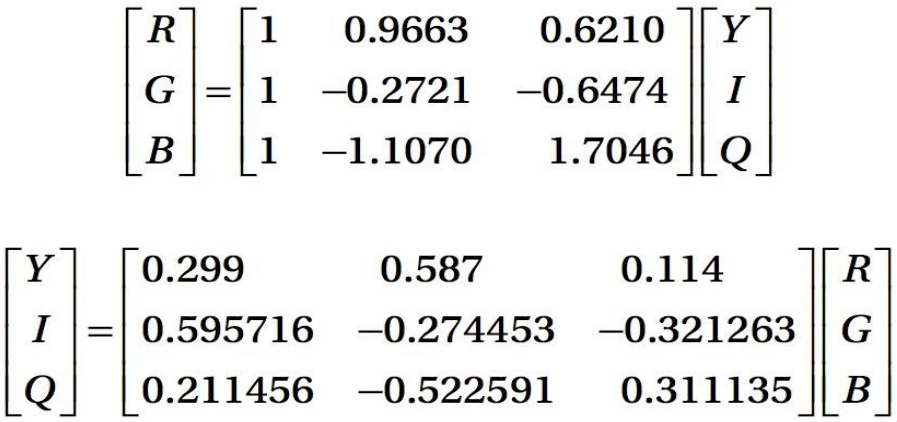
</div>

### 3.1. $RGB \rightarrow YIQ$

In [4]:
# Conversión RGB -> YIQ
def rgb2yiq(image):
    """
    image -> Lista con las componentes RGB de la imagen de forma [R, G, B]
    """
    
    rgb2yiq_matrix = np.array([[0.299,       0.587,       0.114],
                               [0.59590059, -0.27455667, -0.32134392],
                               [0.21153661, -0.52273617,  0.31119955]])
    
    if (image[0].max() > 1) or (image[1].max() > 1) or (image[2].max() > 1):
        image[0] = image[0]/255.0
        image[1] = image[1]/255.0
        image[2] = image[2]/255.0
        
    Y_ = 0
    I_ = 0
    Q_ = 0
    """
    Y = 0.299*Red       + 0.587*Green       + 0.114*Blue
    I = 0.59590059*Red  - 0.27455667*Green  - 0.32134392*Blue
    Q = 0.21153661*Red  - 0.52273617*Green  + 0.31119955*Blue
    """
    for i in range(0,3):
        Y_ += rgb2yiq_matrix[0,i]*image[i]
        I_ += rgb2yiq_matrix[1,i]*image[i]
        Q_ += rgb2yiq_matrix[2,i]*image[i]
    
    return Y_, I_, Q_

### 3.2. $YIQ\rightarrow RGB$

In [5]:
# Conversión YIQ -> RGB
def yiq2rgb(image):
    """
    image -> Lista con las componentes YIQ de la imagen de forma [Y, I, Q]
    """
    
    yiq2rgb_matrix = np.array([[1,  0.9663,  0.6210],
                               [1, -0.2721, -0.6474],
                               [1, -1.1070,  1.7046]])
    R_ = 0
    G_ = 0
    B_ = 0
    """
    R = 1*Y  + 0.9663*I  + 0.6210*Q
    G = 1*Y  - 0.2721*I  - 0.6474*Q
    B = 1*Y  - 1.1070*I  + 1.7046*Q
    """
    for i in range(0,3):
        R_ += yiq2rgb_matrix[0,i]*image[i]
        G_ += yiq2rgb_matrix[1,i]*image[i]
        B_ += yiq2rgb_matrix[2,i]*image[i]
    
    R_ = np.clip(R_*255, 0, 255)
    G_ = np.clip(G_*255, 0, 255)
    B_ = np.clip(B_*255, 0, 255)
    
    return R_, G_, B_

## 4. Cambio de luminancia (Y) y saturación (IQ)

* Se declaran dos funciones: ***change_yiq*** y ***plot_1x3***, las cuales se encargan de modificar los valores de YIQ según los coeficientes ingresados por el usuario y graficarlos en un grid de 1 fila con 3 columnas.

In [6]:
def change_yiq(Y_, I_, Q_, alphas=[], betas=[], plot=True):
    """
    Entradas:
    Y_     - Canal Y de la imagen
    I_     - Canal I de la imagen
    Q_     - Canal Q de la imagen
    alphas - Lista con los coeficientes de la luminancia
    betas  - Lista con los coeficientes de la saturacion
    plot   - Indica si se grafican los resultados

    Salida:
    Retorna un diccionario cuyos 'keys' son el nombre de la
    nueva imagen y los 'values' son una lista de tres elementos
    correspondientes a los nuevos valores de los canales. Ejemplo:

        {
          'image0': [Y1, I1, Q1],
          'image1': [Y2, I2, Q2],
          ...
        }
    """
    # Nuevos valores de YIQ
    new_images = {}
    
    # Debe haber misma cantidad de alphas que betas
    if len(alphas) != len(betas):
        print('Alphas and betas must have the same lenght')
        print('Alphas lenght: ' + str(len(alphas)))
        print('Betas lenght: ' + str(len(betas)))
        
        return new_images
    
    # Cambio de valores Y (luminancia)
    for i in range(0, len(alphas)):
        Y_new = Y_ * alphas[i]
        Y_new = np.clip(Y_new, 0, 1)
        
        new_images['image' + str(i)] = [Y_new]
    
    # Cambio de valores Q e I (saturacion)
    for i in range(0, len(betas)):
        I_new = I_ * betas[i]
        Q_new = Q_ * betas[i]
        
        I_new = np.clip(I_new, -0.5957, 0.5957)
        Q_new = np.clip(Q_new, -0.5226, 0.5226)
        
        new_images['image' + str(i)].append(I_new)
        new_images['image' + str(i)].append(Q_new)
    
    if plot:
        plot_1x3(new_images, alphas, betas)
        
    return new_images

In [7]:
def plot_1x3(images, alphas=[], betas=[]):
    """
    Entradas:
    images - diccionario cuyos 'keys' son el nombre de la
             nueva imagen y los 'values' son una lista de 
             tres elementos correspondientes a los nuevos 
             valores de los canales.

    alphas - Lista con los coeficientes de la luminancia
    betas  - Lista con los coeficientes de la saturacion

    Acción:
    Convierte las imagenes en 'images' de YIQ a RGB y las 
    grafica en un subplot de 1 fila con 3 columnas.
    """
    fig, axs = plt.subplots(1, 3, figsize=(15,15))

    for image_name, channels in images.items():

        # Toma el numero de la imagen: 'image4' -> index=4
        index = int(image_name[5::])
        
        # Transformación del canal YIQ a RGB
        R_new, G_new, B_new = yiq2rgb(channels)
        
        # Nueva imagen modificada
        im_new = im.copy()
        im_new[..., 0] = R_new
        im_new[..., 1] = G_new
        im_new[..., 2] = B_new
        
        axs[index].set_title("$\\alpha=${}     $\\beta=${}".format(alphas[index], betas[index]))
        axs[index].imshow(im_new)
        axs[index].set_axis_off()

    plt.show()

* Se extraen los canales R, G y B de la imagen normalizada y se pasan al espacio Y, I y Q

In [8]:
R = im_norm[..., 0]
G = im_norm[..., 1]
B = im_norm[..., 2]

# Cambio al espacio YIQ
Y, I, Q = rgb2yiq([R, G, B])

### $\alpha < 1$, $\beta = 1$

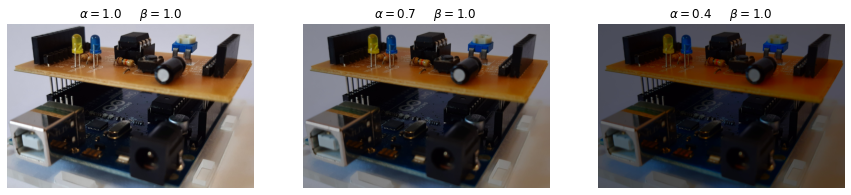

In [9]:
alphas = [1.0, 0.7, 0.4]
betas  = [1.0, 1.0, 1.0]

new_YIQ_values = change_yiq(Y, I, Q, alphas, betas)

### $\alpha > 1$, $\beta = 1$

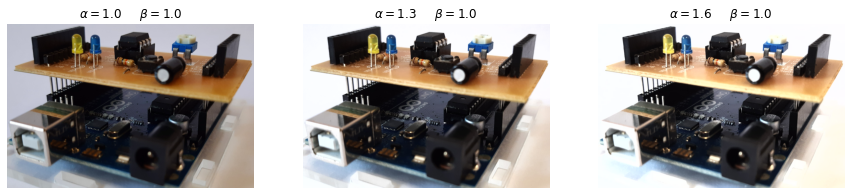

In [10]:
alphas = [1.0, 1.3, 1.6]
betas  = [1.0, 1.0, 1.0]

new_YIQ_values = change_yiq(Y, I, Q, alphas, betas)

### $\alpha = 1$, $\beta < 1$

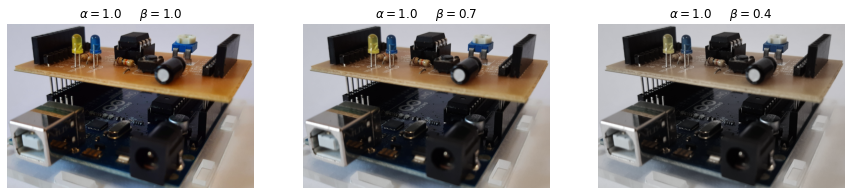

In [11]:
alphas = [1.0, 1.0, 1.0]
betas  = [1.0, 0.7, 0.4]

new_YIQ_values = change_yiq(Y, I, Q, alphas, betas)

### $\alpha = 1$, $\beta > 1$

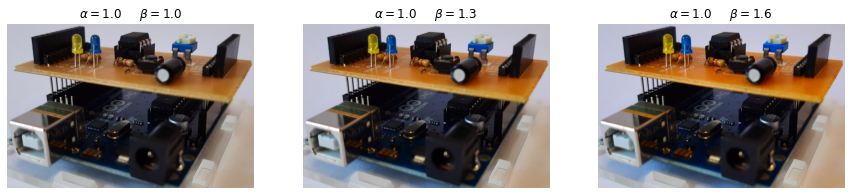

In [12]:
alphas = [1.0, 1.0, 1.0]
betas  = [1.0, 1.3, 1.6]

new_YIQ_values = change_yiq(Y, I, Q, alphas, betas)

### Combinación de $\alpha$ y $\beta$

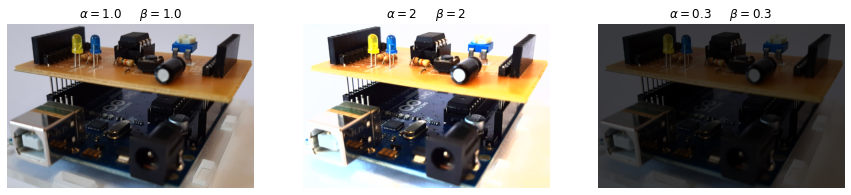

In [13]:
alphas = [1.0, 2, 0.3]
betas  = [1.0, 2, 0.3]

new_YIQ_values = change_yiq(Y, I, Q, alphas, betas)

## 5. Mapas cromáticos

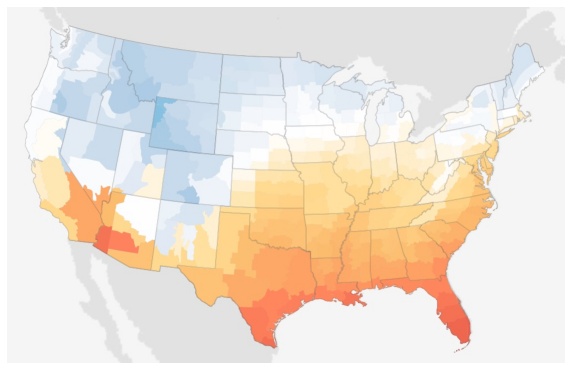

In [25]:
file_name = 'heatmap_us.jpg'

temp_map = Image.open(path + file_name)

# Convertir en una matriz Numpy de uint8
temp_image = np.array(temp_map).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(temp_image)
plt.axis('off')
plt.show()

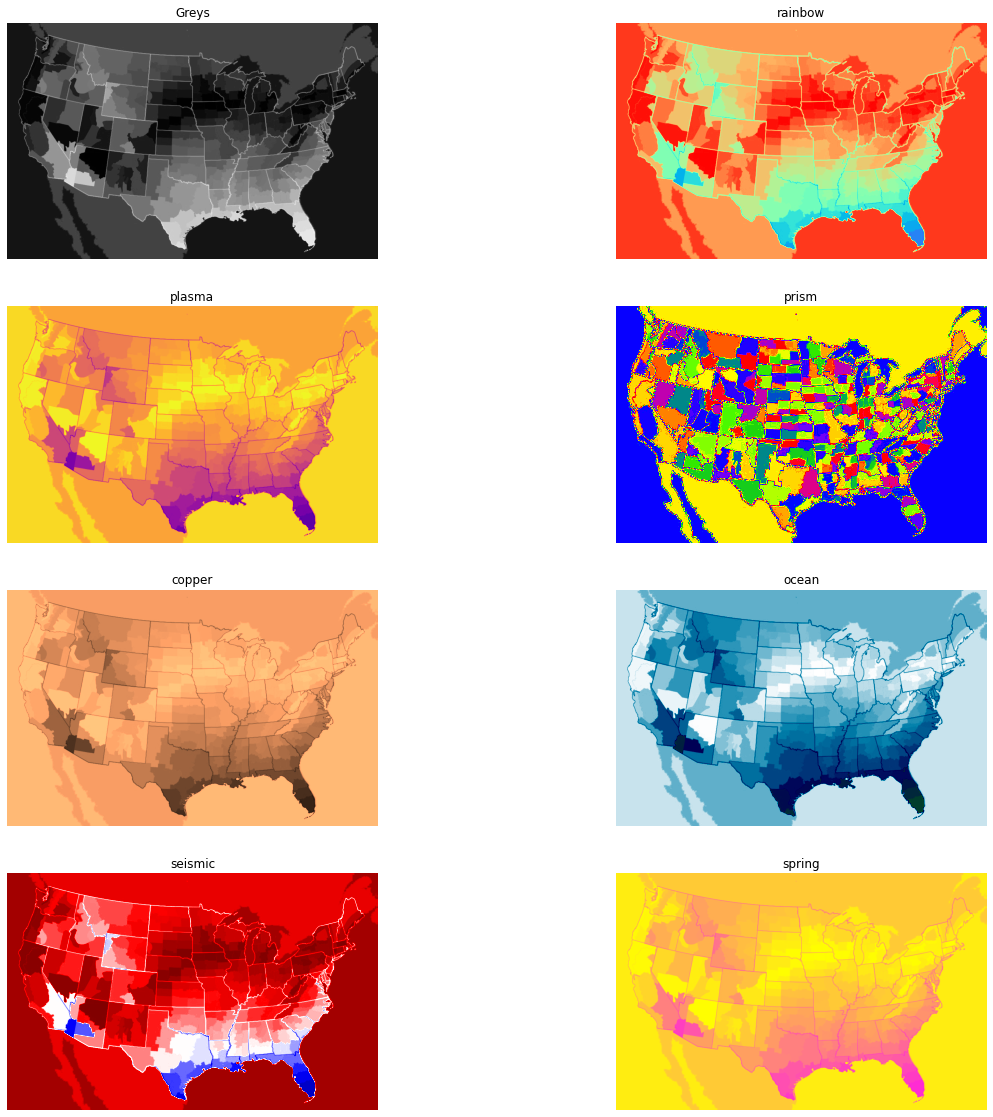

In [37]:
R = temp_image[..., 0]
G = temp_image[..., 1]
B = temp_image[..., 2]

# Cambio al espacio YIQ
Y, I, Q = rgb2yiq([R, G, B])

palettes = ['Greys', 'rainbow', 'plasma', 'prism', 'copper', 'ocean', 'seismic', 'spring']

fig, axs = plt.subplots(4, 2, figsize=(20,20))

row = 0
col = 0

for palette in palettes:

    axs[row, col].set_title(palette)
    axs[row, col].imshow(Y, cmap=palette)
    axs[row, col].set_axis_off()
    
    col += 1
    if col > 1:
        col = 0
        row += 1

plt.show()

## Links de interés

* [Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

* [Snapshots image gallery](https://www.climate.gov/maps-data/data-snapshots/data-source/temperature-minimum-1981-2010-monthly-average)